### Title: Car Price Prediction
Car Price Prediction using
**Decision Tree** and **Random Forest Regression** Method
<hr>
<strong>Task No : 03</strong><br>
<hr>

### libray and Dataset Importing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [2]:
data = pd.read_csv("Car Price.csv")

### Data Preprocessing and Analysing

In [3]:
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
data.drop('car_ID', axis=1, inplace=True)

In [5]:
data.columns

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

<hr>
There are total <b>26 Columns</b> which containg both <b>Categorical</b> and <b>Numerical</b> types values.
<br>Hence, we have to separate the both categorical and numerical valued columns.<br>
<hr>

In [6]:
ObjectCols , NumCols = [], []

In [7]:
ObjectCols=data.select_dtypes(include='object').columns.tolist()
NumCols = data.select_dtypes(include=("int", "float")).columns.tolist()

In [8]:
print(ObjectCols)

['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']


In [9]:
print(NumCols)

['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']


<hr>
Here, the <b>ObjectCols</b> list contains all the index of columns which contains <b>object</b> type values.<br>
And the <b>NumCols</b> list contains all the index of columns which have <b>numeric (int, float)</b> values.<br>

<hr>

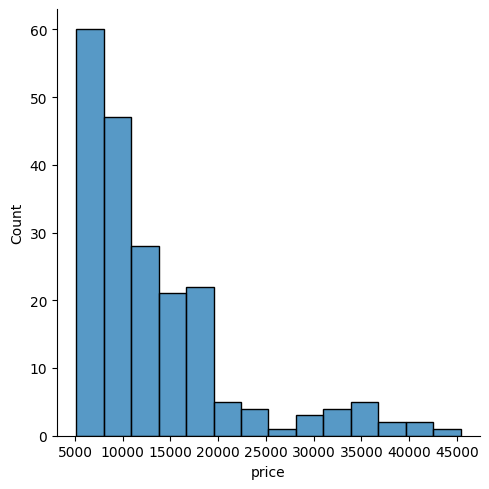

In [10]:
sns.displot(data['price'])
plt.show()

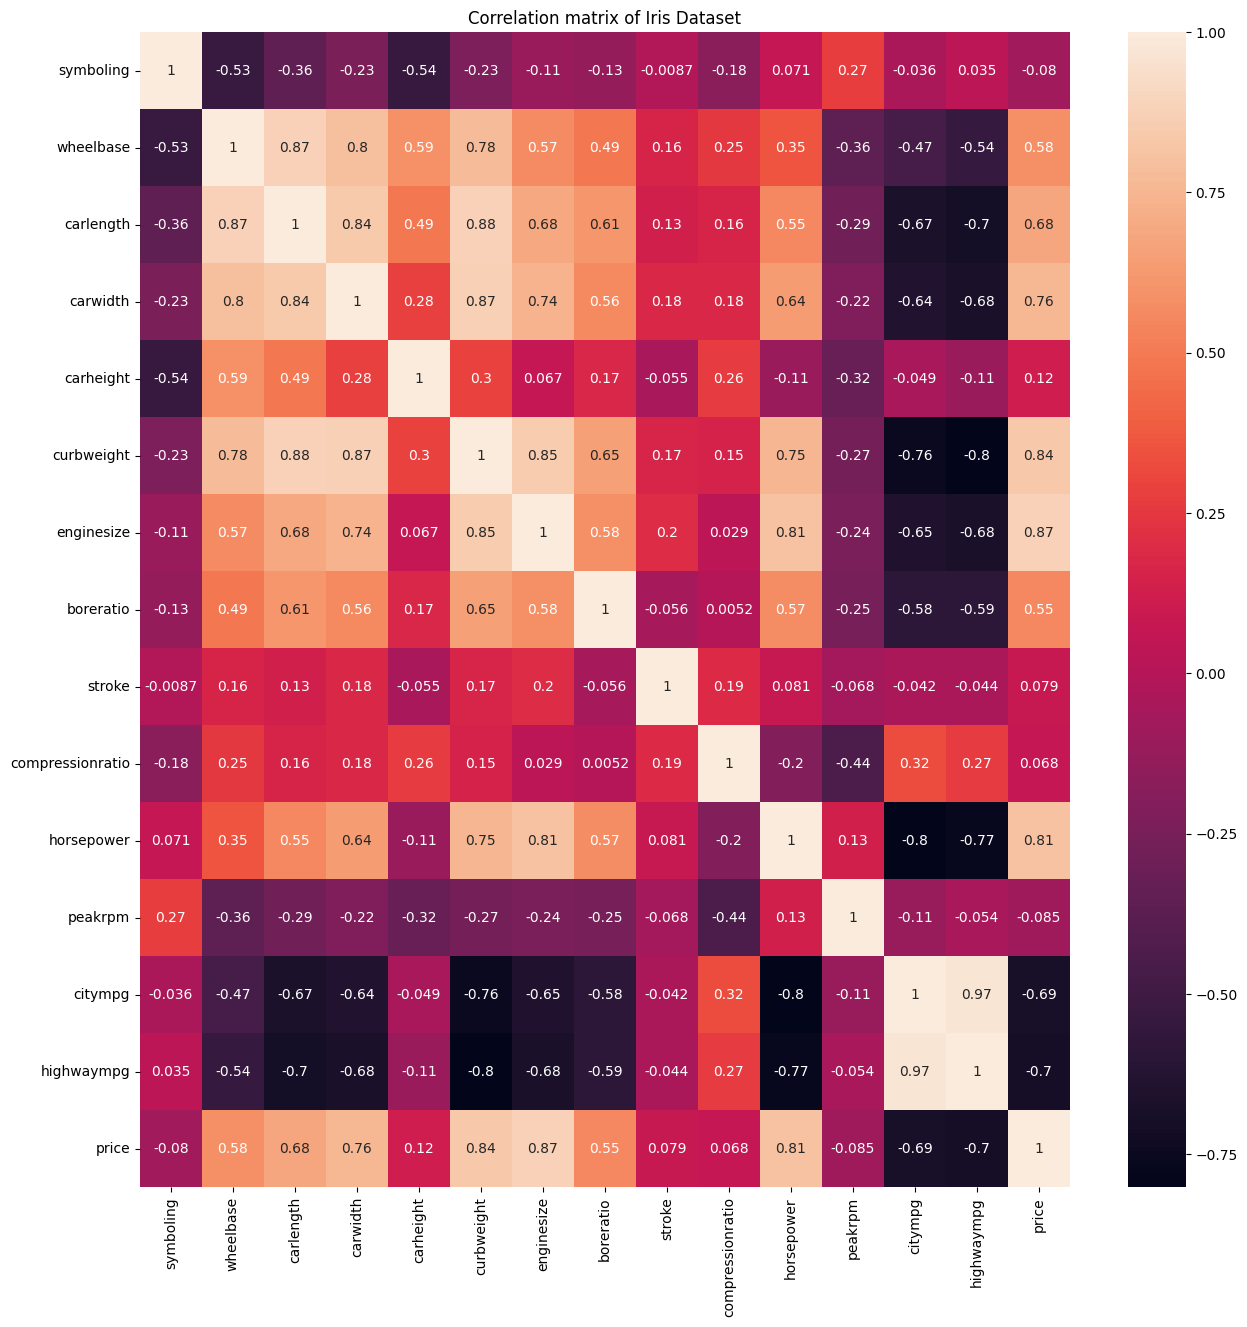

In [11]:
plt.figure(figsize=(15,15))
plt.title("Correlation matrix of Iris Dataset")

sns.heatmap(data.corr(), annot=True)
plt.show()

### Creating Datasets for further processing

In [12]:
target = 'price'
CarData = data[NumCols]

In [13]:
X = CarData.drop(target, axis=1)
y = CarData[target]

print(X.head(1))

print("\n"*5)
print(y.head(1))

   symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
0          3       88.6      168.8      64.1       48.8        2548   

   enginesize  boreratio  stroke  compressionratio  horsepower  peakrpm  \
0         130       3.47    2.68               9.0         111     5000   

   citympg  highwaympg  
0       21          27  






0    13495.0
Name: price, dtype: float64


### Splitting datasets into TEST and TRAIN datasets

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   train_size=0.8,
                                                   test_size=0.2,
                                                   random_state=42)


### Decision Tree Regressor

In [15]:
rgr = DecisionTreeRegressor()
DTR_model = rgr.fit(X_train, y_train)

### Random Forest Regressor

In [16]:

rgr =RandomForestRegressor()
RFR_model = rgr.fit(X_train, y_train)


### Testing and Accuracy

In [17]:
def return_calc(test_data, model_name):
    
    name = str(model_name)
    predictions = model_name.predict(test_data)
    r2 = r2_score(y_test, predictions)

    print(f"""
        >>{name}
            R2_SCORE : {r2:.2%}
    """)
    
    

In [18]:
return_calc(X_test, DTR_model)
return_calc(X_test, RFR_model)


        >>DecisionTreeRegressor()
            R2_SCORE : 91.01%
    

        >>RandomForestRegressor()
            R2_SCORE : 96.01%
    
